# US Store Sales

- ### <a href="#intro">Introduction</a>
- ### <a href="#wrangling">Data Wrangling</a>
- ### <a href="#eda">Exploratory Data Analysis</a>
- ### <a href="#conc"> EDA Conclusion</a>
- ### <a href="#ml">Machine Learning</a>

## <a id='intro'>introduction</a>

<b>This dataset contains information about Sales Values in Dollars on American Stores between 2010 and 2011.<br>
In particular, this dataset contains:<br>

>- <b>Stores'</b> Area, State, Region and Size;<br>
>- <b>Products'</b> ID, Description, Type, Category and Sale Date;<br>
>- <b>Accounting Info</b>, such as Budget Margin, Profit, Total Expenses and Marking.<br>

### Columns' names:

- <b>Area Code:</b> Store's Code;
- <b>State:</b> Store's State;
- <b>Market:</b> Store's Region;
- <b>Market Size:</b> Store's Size;
- <b>Profit:</b> Profits in Dollars 
- <b>Margin:</b> Profit + Total Expenses OR Sales - COGS;
- <b>Sales:</b> Values Acquired in Sales ;
- <b>COGS:</b> Cost of Goods Sold ;
- <b>Total Expenses:</b> Total Expenses to get the Product to Sell ;
- <b>Marketing:</b> Expenses in Marketing ;
- <b>Inventory:</b> Inventory Value of the Product in the Sale Moment ;
- <b>Budget Profit:</b> Expected Profit ;
- <b>Budget COGS:</b> Expected COGS ;
- <b>Budget Margin:</b> Expected Profit + Expected Total Expenses OR Expected Sales - Expected COGS;
- <b>Budget Sales:</b> Expected Value Acquired in Sales ;
- <b>ProductID:</b> Product ID;
- <b>Date:</b> Sale Date;
- <b>Product Type:</b> Product Category;
- <b>Product:</b> Product Description;
- <b>Type:</b> Type;

## <a id="wrangling">Data Wrangling</a>

### 0 | Import library

In [1]:
# first we need to import our libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import plotly as ply
import pymysql

#### I've imported US store sales dataset to Mysql database and now we'll create a a connection to extract it

In [2]:
#my mysql instance info
db_name = 'Sales' #the db i'm connecting to
db_host = 'localhost'
db_username = 'root'
db_password = '7291'

In [3]:
# testing the connection
try:
    conn=pymysql.connect(host=db_host,
                       port=int(3306),
                       user='root',
                       password=db_password,
                       db=db_name)
except e:
    print(e)

In [4]:
if conn:
    print('Successfully connected')
else:
    print('Error')

Successfully connected


In [5]:
cursor = conn.cursor()

In [6]:
cursor.execute('use sales')

0

In [7]:
df = pd.read_sql_query('select * from sales', conn)

C:\Users\Dell\AppData\Local\Temp\ipykernel_2508\2626490663.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query('select * from sales', conn)


In [8]:
df.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


In [9]:
# getting columns names
print(df.columns)
print("")
print(f'num of rows: {df.shape[0]}\nnum of columns: {df.shape[1]}')

Index(['Area Code', 'State', 'Market', 'Market Size', 'Profit', 'Margin',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales',
       'ProductId', 'Date', 'Product Type', 'Product', 'Type'],
      dtype='object')

num of rows: 4248
num of columns: 20


> - I think we can change the (Area Code) column to be --> (Store Code) so that it would be more representative<br> 
> - Rename (Margine) column to be --> (Gross Profit) same for (Budget Margine) --> (Budget Gross Profit)<br>
Explanation: Margine isn't a number it is a percentage. if we tock column 1 and applied <br>
the Gross Profit formula --> Sales(292) - COGS(116) = 176.
> - leave the other columns' names as it is 

In [10]:
df.rename(columns={"Area Code": "Store Code", 'Margin': 'Gross Profit', 'Budget Margin': 'Budget Gross Profit'}, inplace=True)

> - A good practice is to recalculate any available calculated field so let's recalculate the Gross Profit and the Budget Gross Profit since its a calculated field
> - We won't recalculate Profit since it requires interest and D&A

In [11]:
df['Gross Profit'] = df['Sales'] - df['COGS']
df['Budget Gross Profit'] = df['Budget Sales'] - df['Budget COGS']

In [12]:
df.head()

,Store Code,State,Market,Market Size,Profit,Gross Profit,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Gross Profit,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,133.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


In [13]:
rows, cols = df.shape
print(f'Number of rows: {rows}\nNumber of columns: {cols}')

Number of rows: 4248
Number of columns: 20


In [14]:
# getting non nulls and the dtype of each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store Code           4248 non-null   int64  
 1   State                4248 non-null   object 
 2   Market               4248 non-null   object 
 3   Market Size          4248 non-null   object 
 4   Profit               4248 non-null   float64
 5   Gross Profit         4248 non-null   float64
 6   Sales                4248 non-null   float64
 7   COGS                 4248 non-null   float64
 8   Total Expenses       4248 non-null   float64
 9   Marketing            4248 non-null   float64
 10  Inventory            4248 non-null   float64
 11  Budget Profit        4248 non-null   float64
 12  Budget COGS          4248 non-null   float64
 13  Budget Gross Profit  4248 non-null   float64
 14  Budget Sales         4248 non-null   float64
 15  ProductId            4248 non-null   i

In [15]:
# seems like there's no missing values, but to make sure we haven't missing somthong
df.isnull().sum()

Store Code             0
State                  0
Market                 0
Market Size            0
Profit                 0
Gross Profit           0
Sales                  0
COGS                   0
Total Expenses         0
Marketing              0
Inventory              0
Budget Profit          0
Budget COGS            0
Budget Gross Profit    0
Budget Sales           0
ProductId              0
Date                   0
Product Type           0
Product                0
Type                   0
dtype: int64

> OK no missing Values

#### what is the data type of Date

In [16]:
type(df.Date[0])

str

> - <b>looks like there's no null values</b></br>
> - <b>some data types needs to be fixed like:</b></br>
    > 1- Area Code & ProductId: needs to be an object since we won't perform any calculations on it <br/>
    > 2- Date: needs to be converted into datetime

In [17]:
# fixing columns data type
df["Store Code"] = df["Store Code"].astype(str)
df["ProductId"] = df["ProductId"].astype(str)
df["Date"] = pd.to_datetime(df["Date"])

In [18]:
print(f'Store Code: {type(df["Store Code"][0])}')
print(f'ProductId: {type(df["ProductId"][0])}')
print(f'Date: {type(df["Date"][0])}')

Store Code: <class 'str'>
ProductId: <class 'str'>
Date: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### is there duplicates in the data ? 

In [19]:
df.duplicated().sum()

0

> no duplicates

### now we need to go deeper into each column to better understand our data

##### 1 | starting with " Categorical data"

In [20]:
df.columns

Index(['Store Code', 'State', 'Market', 'Market Size', 'Profit',
       'Gross Profit', 'Sales', 'COGS', 'Total Expenses', 'Marketing',
       'Inventory', 'Budget Profit', 'Budget COGS', 'Budget Gross Profit',
       'Budget Sales', 'ProductId', 'Date', 'Product Type', 'Product', 'Type'],
      dtype='object')

##### our categorical data are:
> - Store Code (Nominal) 
> - State
> - Market
> - Market Size
> - ProductId (Nominal)
> - Product Type
> - Product
> - Type
> - Date (ordinal)

In [21]:
# creating a list of categorical columns' names
col_list = ["Store Code", "State", "Market", "Market Size", "ProductId", "Product Type", "Product", "Type"]

In [22]:
for col in col_list:
    print('\033[1m'+f'{col}:'+'\033[1m')
    print("")
    print(df[col].value_counts())
    print("-"*30)
    print(f'{col} count: {len(df[col].value_counts())}')
    print("-"*30)
    print("-"*30)
    print("")

Store Code:

435    215
603    168
505    168
775    144
702    120
      ... 
940      4
361      4
713      4
858      4
559      4
Name: Store Code, Length: 156, dtype: int64
------------------------------
Store Code count: 156
------------------------------
------------------------------

State:

Utah             288
California       288
Colorado         264
Oregon           264
Nevada           264
Washington       240
Ohio             216
Illinois         216
Florida          216
Wisconsin        216
Missouri         216
Iowa             216
New York         192
Louisiana        168
Oklahoma         168
Texas            168
New Mexico       168
New Hampshire    168
Connecticut      168
Massachusetts    144
Name: State, dtype: int64
------------------------------
State count: 20
------------------------------
------------------------------

Market:

West       1344
Central    1344
East        888
South       672
Name: Market, dtype: int64
------------------------------
Market coun

### Conclusion:

> - there are no typos or duplicated text.
> - there is no unique id for our dataset, so i'll create one to help me when i group the data.

> - We have 156 stores distributed across 20 states.
> - there are 4 markets and 2 types of market sizes small and major.
> - We have 13 products categorized into 4 products type: (Espresso - Coffee - Herbal Tea - Tea).
> - Products can be either Regular or Decaf which stands for decaffeinated.


In [23]:
# creating an id for each record
df['id'] = df.index + 1
df.columns

Index(['Store Code', 'State', 'Market', 'Market Size', 'Profit',
       'Gross Profit', 'Sales', 'COGS', 'Total Expenses', 'Marketing',
       'Inventory', 'Budget Profit', 'Budget COGS', 'Budget Gross Profit',
       'Budget Sales', 'ProductId', 'Date', 'Product Type', 'Product', 'Type',
       'id'],
      dtype='object')

In [24]:
# i need the id to be the first column so i'll rearrange the columns
df = df.reindex(columns=['id','Store Code', 'State', 'Market', 'Market Size', 'Profit', 'Gross Profit',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Gross Profit', 'Budget Sales',
       'ProductId', 'Date', 'Product Type', 'Product', 'Type'])
df.head(2)

,id,Store Code,State,Market,Market Size,Profit,Gross Profit,Sales,COGS,Total Expenses,...,Inventory,Budget Profit,Budget COGS,Budget Gross Profit,Budget Sales,ProductId,Date,Product Type,Product,Type
0,1,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,...,962.0,110.0,110.0,160.0,270.0,2,2010-04-01,Coffee,Columbian,Regular
1,2,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,...,1148.0,90.0,80.0,130.0,210.0,2,2010-07-01,Coffee,Columbian,Regular


#### Date (ordinal)

#### The data was extracted between January 1th in 2010 and December 31th in 2011.
let's check the date distribution

In [25]:
print('Our data ranges from:')
print(f'min date: {df["Date"].min()}')
print(f'max date: {df["Date"].max()}')

Our data ranges from:
min date: 2010-01-01 00:00:00
max date: 2011-12-01 00:00:00


##### 2 |  Numerical Data

In [26]:
# getting columns names
df.columns

Index(['id', 'Store Code', 'State', 'Market', 'Market Size', 'Profit',
       'Gross Profit', 'Sales', 'COGS', 'Total Expenses', 'Marketing',
       'Inventory', 'Budget Profit', 'Budget COGS', 'Budget Gross Profit',
       'Budget Sales', 'ProductId', 'Date', 'Product Type', 'Product', 'Type'],
      dtype='object')

In [27]:
df[['Profit', 'Gross Profit',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Gross Profit', 'Budget Sales']].describe()

,Profit,Gross Profit,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Gross Profit,Budget Sales
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,61.097693,108.554379,192.987524,84.433145,54.063559,31.185028,749.381356,60.913371,74.830508,100.819209,175.649718
std,101.708546,96.646250,151.133127,67.249769,32.352598,27.023264,661.031896,79.546123,66.238145,92.602725,148.891522
min,-638.000000,-283.000000,17.000000,0.000000,10.000000,0.000000,-3534.000000,-320.000000,0.000000,-210.000000,0.000000
25%,17.000000,55.000000,100.000000,43.000000,33.000000,13.000000,432.000000,20.000000,30.000000,50.000000,80.000000
50%,40.000000,80.000000,138.000000,60.000000,46.000000,22.000000,619.000000,40.000000,50.000000,70.000000,130.000000
75%,92.000000,139.000000,230.000000,100.000000,65.000000,39.000000,910.500000,80.000000,90.000000,130.000000,210.000000
max,778.000000,613.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000


### Conclusion:

> <B><font color='red'>Profit & Budget Profit:</font></B> Profit is Right skewed with a max profit of 778 which is an outlier, also we can notice that the min profit is a negative value which indicates a loss. The same conditions apply to Budget profit but with smaller values, Budget Profit is skewed to the right and has an outlier of 450, Budget Profit also indicates a negative profit value but it was half the actual loss of about 320.<br>
<br>
> <B><font color='red'>Gross Profit & Budget Gross Proit:</font></B> they are also right skewed unlike Profit and Budget Profit, there isn't a huge difference between Gross Profit & Budget Gross as they have a min & max -283 & 613 and -210 & 690 respectively. we can also notice theat min value is negative which is normal because Margine is calculated from the Profit.<br>
<br>
> <B><font color='red'>Sales & budget sales:</font></B> also are right-skewed with a large outlier compared to the median. we can notice that the actual sales were better than the budget sales, for it was expected to have a min sales of 0 but the actual sales min value was 17.<br>
<br>
> <B><font color='red'>COGS & Budget COGS:</font></B> the starting balance for COGS was 0 which indicates that the company is using the ZBB method (Zero-Based-Budgetting). these two columns also are right-skewed.<br>
<br>
> <B><font color='red'>Total Expenses:</font></B> there isn't a large variation between the mean and the median but it still happens that there is an outlier of 190 that pulls the expenses' mean toward the right generating a right-skewed distribution<br>
<br>
> <B><font color='red'>Marketing:</font></B> starts from 0 balance, there is no large variation in the marketing costs except for the outliers that pulls the mean to the right<br>
<br>
> <B><font color='red'>Finnaly inventory:</font></B> a negative inventory balance can occur when a shipment of inventory has been recorded as complete even though it might still be in production which causes delay. inventory distribution also is right-skewed with a huge outlier of 8252.<br>
<br>
> these variations and outliers occur because our data contains different types of market sizes.<br>

### We need to know the State, market, and products associated with:
> * 1- high/low Profit
> * 2- High/low sales
> * 3- marketing

#### 4 | Extracting Day, Month, Quarter and Year from Date

In [28]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter

In [29]:
# displaying all the columns
pd.set_option('display.max_columns', None)
df.head()

,id,Store Code,State,Market,Market Size,Profit,Gross Profit,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Gross Profit,Budget Sales,ProductId,Date,Product Type,Product,Type,Month,Day,Year,Quarter
0,1,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,2010-04-01,Coffee,Columbian,Regular,4,1,2010,2
1,2,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2010-07-01,Coffee,Columbian,Regular,7,1,2010,3
2,3,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,2010-11-01,Coffee,Columbian,Regular,11,1,2010,4
3,4,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,2010-12-01,Coffee,Columbian,Regular,12,1,2010,4
4,5,203,Connecticut,East,Small Market,104.0,133.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2011-07-01,Coffee,Columbian,Regular,7,1,2011,3


### Now our data looks fine, we've checked for the following:

> - 1- wrong or unrepresentative column names
> - 2- missing values
> - 3- duplicates
> - 4- wrong datatypes
> - 5- In categorical values we checked for Typos or duplicated values that may be spelled incorrectly
> - 6- we've interpreted a statistical summary of the numeric values, and understand the data distribution and the reason behind each value.
> - 7- And finally xtracted needed data that could support our analysis.

## Now we can berform EDA

## <a id="eda">EXPLORATORY DATA ANALYSIS (EDA)</a>

### Some Questions we'll be answering to for: 


> 1 - How manu stores in Each state? 
> 2 - profit and sales per store, wat are the top 10 stores in terms of Profit, sales ? 
> 3 - how much marketing is spend in the top 10 stores / states 
> 4 - same for the lowest 10 
> 3 - Profit and sales per state
> 5 - top 10 stores by store code
> 6 - count of states 
> 7 - market portions (parito chart) (count, profit)
> 8 - product (pie chart)  (count , profit)
> 9 - products (par chart) ( count, profit)
> 10 - product type (pie chart) (count, profit, max and min sales)
> 11 - group data by financial year into tow years 

In [30]:
df.columns

Index(['id', 'Store Code', 'State', 'Market', 'Market Size', 'Profit',
       'Gross Profit', 'Sales', 'COGS', 'Total Expenses', 'Marketing',
       'Inventory', 'Budget Profit', 'Budget COGS', 'Budget Gross Profit',
       'Budget Sales', 'ProductId', 'Date', 'Product Type', 'Product', 'Type',
       'Month', 'Day', 'Year', 'Quarter'],
      dtype='object')

## 1 | Exploring Products

### how much do we sell from each product type?

C:\Users\Dell\AppData\Local\Temp\ipykernel_2508\2662941871.py:5: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(type_pie.values, labels=type_pie.index, autopct='%1.2f%%', colors=mycolors,


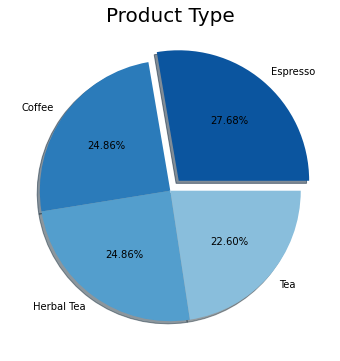

In [31]:
mycolors = sns.color_palette('Blues_r')
explode = [0.1, 0, 0, 0]
type_pie = df['Product Type'].value_counts()/df.shape[0]
plt.figure(figsize=(8, 6))
plt.pie(type_pie.values, labels=type_pie.index, autopct='%1.2f%%', colors=mycolors,
       explode = explode, shadow = True)
plt.title("Product Type", fontsize=20)
plt.show()

> our stores sells almost equal amounts of the 4 product types

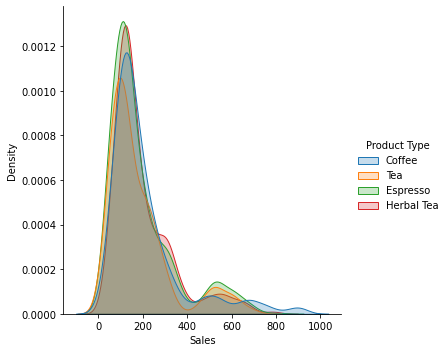

In [32]:
sns.displot(df, x="Sales", hue="Product Type", kind="kde", fill=True)

> This KDE plot holds a lot of info, but its hard to interpret so i'll split it into two KDE plots

In [33]:
# creating two data frames that are filtered by the profuct type
Tea_df = df[(df["Product Type"] == "Herbal Tea") | (df["Product Type"] == "Tea")]
coffe_df = df[(df["Product Type"] == "Espresso") | (df["Product Type"] == "Coffee")]

In [34]:
# I m creating a df for each product type so i can extract mean, mode, and median
coffee = coffe_df[coffe_df['Product Type'] == "Coffee"].Sales
espresso = coffe_df[coffe_df['Product Type'] == "Espresso"].Sales
tea = Tea_df[Tea_df['Product Type'] == "Tea"].Sales
herbal = Tea_df[Tea_df['Product Type'] == "Herbal Tea"].Sales

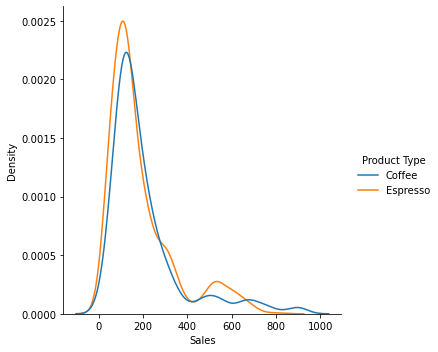

 Coffee | Min(23), Median(146), Mode(190), Mean(205),Max(912)
Espresso | Min(39), Median(131), Mode(43), Mean(190),Max(815) 


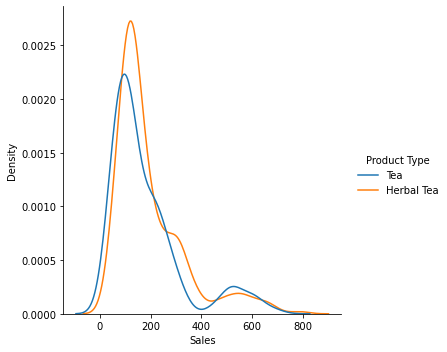

 Tea | Min(17), Median(130), Mode(43), Mean(180), Max(716)
 Herbal Tea | Min(39), Median(142), Mode(190), Mean(196), Max(796)


In [35]:
# plotting Kernel density estimation to visualize the sales distribution per product type
sns.displot(coffe_df, x="Sales", hue="Product Type", kind="kde")
plt.show()

print(f'\033[94m Coffee | Min({round(coffee.min())}), Median({round(coffee.median())}), Mode({round(coffee.mode().values[0])}), Mean({round(coffee.mean())}),Max({round(coffee.max())})')
print(f'\033[93mEspresso | Min({round(espresso.min())}), Median({round(espresso.median())}), Mode({round(espresso.mode().values[0])}), Mean({round(espresso.mean())}),Max({round(espresso.max())}) ')

sns.displot(Tea_df, x="Sales", hue="Product Type", kind="kde")
plt.show()

print(f'\033[94m Tea | Min({round(tea.min())}), Median({round(tea.median())}), Mode({round(tea.mode().values[0])}), Mean({round(tea.mean())}), Max({round(tea.max())})')
print(f'\033[93m Herbal Tea | Min({round(herbal.min())}), Median({round(herbal.median())}), Mode({round(herbal.mode().values[0])}), Mean({round(herbal.mean())}), Max({round(herbal.max())})')

## let's get deeper into Product types Hierarchy

### What are the products that fall under the 4 product types?

In [36]:
df.groupby(['Product Type', 'Product', 'Type']).count()[['id']]

id
Product Type Product           Type        
Coffee       Amaretto          Regular  192
             Columbian         Regular  480
             Decaf Irish Cream Decaf    384
Espresso     Caffe Latte       Regular  216
             Caffe Mocha       Regular  480
             Decaf Espresso    Decaf    408
             Regular Espresso  Regular   72
Herbal Tea   Chamomile         Decaf    384
             Lemon             Decaf    480
             Mint              Decaf    192
Tea          Darjeeling        Regular  384
             Earl Grey         Regular  288
             Green Tea         Regular  288

> Product type hierarchy, against each product total count 

### we need to split the data into 2 financial years 2010 and 2011

In [37]:
df_2010 = df[df['Year'] == 2010]
df_2011 = df[df['Year'] == 2011]

In [38]:
df.columns

Index(['id', 'Store Code', 'State', 'Market', 'Market Size', 'Profit',
       'Gross Profit', 'Sales', 'COGS', 'Total Expenses', 'Marketing',
       'Inventory', 'Budget Profit', 'Budget COGS', 'Budget Gross Profit',
       'Budget Sales', 'ProductId', 'Date', 'Product Type', 'Product', 'Type',
       'Month', 'Day', 'Year', 'Quarter'],
      dtype='object')

### what was the Total Profit genrated by each product?

### 1 | year 2010

In [39]:
P_2010 = df_2010.groupby(['Product Type', 'Product', 'Type']).sum()[['Profit','Gross Profit', "Sales", "COGS", "Total Expenses","Marketing", 'Inventory']]
P_2010

C:\Users\Dell\AppData\Local\Temp\ipykernel_2508\1224865781.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  P_2010 = df_2010.groupby(['Product Type', 'Product', 'Type']).sum()[['Profit','Gross Profit', "Sales", "COGS", "Total Expenses","Marketing", 'Inventory']]


Profit  Gross Profit    Sales  \
Product Type Product           Type                                      
Coffee       Amaretto          Regular   1983.0        6475.0  12841.0   
             Columbian         Regular  22777.0       38626.0  62824.0   
             Decaf Irish Cream Decaf     5708.0       15685.0  30469.0   
Espresso     Caffe Latte       Regular   4636.0        9912.0  17559.0   
             Caffe Mocha       Regular   7201.0       22542.0  41537.0   
             Decaf Espresso    Decaf    12025.0       21581.0  38240.0   
             Regular Espresso  Regular   4092.0        6551.0  11750.0   
Herbal Tea   Chamomile         Decaf    11093.0       21276.0  36969.0   
             Lemon             Decaf    12195.0       26209.0  46956.0   
             Mint              Decaf     2511.0        7515.0  17480.0   
Tea          Darjeeling        Regular  11844.0       20532.0  35799.0   
             Earl Grey         Regular   9851.0       18393.0  32670.0   
             Green Tea         Regular    -90.0        6526.0  16065.0   

                                           COGS  Total Expenses  Marketing  \
Product Type Product           Type                                          
Coffee       Amaretto          Regular   6366.0          4492.0     2329.0   
             Columbian         Regular  24198.0         15849.0     8673.0   
             Decaf Irish Cream Decaf    14784.0          9977.0     5681.0   
Espresso     Caffe Latte       Regular   7647.0          5276.0     2736.0   
             Caffe Mocha       Regular  18995.0         15341.0     9843.0   
             Decaf Espresso    Decaf    16659.0          9556.0     5056.0   
             Regular Espresso  Regular   5199.0          2459.0     1473.0   
Herbal Tea   Chamomile         Decaf    15693.0         10183.0     6083.0   
             Lemon             Decaf    20747.0         14014.0     7940.0   
             Mint              Decaf     9965.0          5004.0     3054.0   
Tea          Darjeeling        Regular  15267.0          8688.0     4883.0   
             Earl Grey         Regular  14277.0          8542.0     4923.0   
             Green Tea         Regular   9539.0          6616.0     3563.0   

                                        Inventory  
Product Type Product           Type                
Coffee       Amaretto          Regular    71138.0  
             Columbian         Regular   169812.0  
             Decaf Irish Cream Decaf     161027.0  
Espresso     Caffe Latte       Regular    27647.0  
             Caffe Mocha       Regular   181498.0  
             Decaf Espresso    Decaf     154062.0  
             Regular Espresso  Regular    31667.0  
Herbal Tea   Chamomile         Decaf     136828.0  
             Lemon             Decaf     172449.0  
             Mint              Decaf     105207.0  
Tea          Darjeeling        Regular   141664.0  
             Earl Grey         Regular   109033.0  
             Green Tea         Regular   129654.0

> Green Tea genrats a negative profit

#### Which product was associated with the largest profit ?

In [40]:
P_2010[P_2010['Profit'] == P_2010['Profit'].max()]

,,,Profit,Gross Profit,Sales,COGS,Total Expenses,Marketing,Inventory
Product Type,Product,Type,,,,,,,
Coffee,Columbian,Regular,22777.0,38626.0,62824.0,24198.0,15849.0,8673.0,169812.0


### We'll need to visualize these data so that we can have a better understanding of their variation

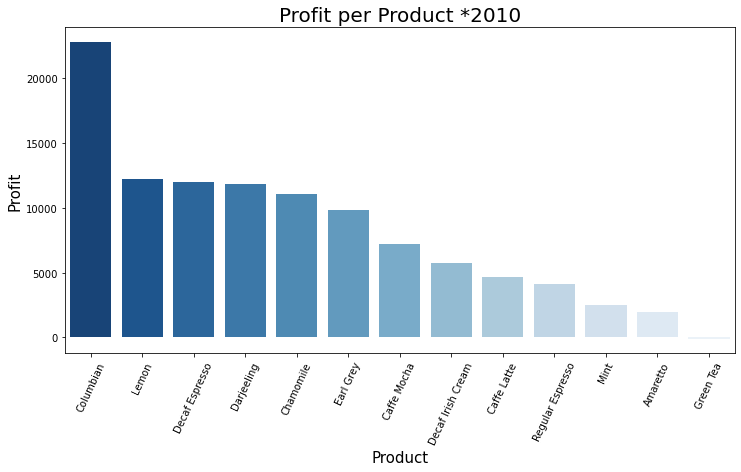

In [41]:
# creatin a sorted df
P_2010_s = P_2010.sort_values(by="Profit",ascending=False)

# extracting the indexes names form the grouped data
g1_names = []
for i in range(len(P_2010_s)):
    v = P_2010_s.index[i][1]
    g1_names.append(v)

# extracting the indexes vlaues form the grouped data
g1_values = P_2010_s['Profit'].values

plt.figure(figsize=(12,6))
sns.barplot(x=g1_names,y=g1_values,palette='Blues_r')
plt.xticks(rotation=65)
plt.title("Profit per Product *2010", fontsize=20)
plt.xlabel("Product", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.show()

### 2 | year 2011

In [42]:
P_2011 = df_2011.groupby(['Product Type', 'Product', 'Type']).sum()[['Profit','Gross Profit', "Sales", "COGS", "Total Expenses","Marketing", 'Inventory']]
P_2011

C:\Users\Dell\AppData\Local\Temp\ipykernel_2508\3307616504.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  P_2011 = df_2011.groupby(['Product Type', 'Product', 'Type']).sum()[['Profit','Gross Profit', "Sales", "COGS", "Total Expenses","Marketing", 'Inventory']]


Profit  Gross Profit    Sales  \
Product Type Product           Type                                      
Coffee       Amaretto          Regular   2907.0        7062.0  13428.0   
             Columbian         Regular  33027.0       41289.0  65487.0   
             Decaf Irish Cream Decaf     8281.0       16995.0  31779.0   
Espresso     Caffe Latte       Regular   6739.0       10693.0  18340.0   
             Caffe Mocha       Regular  10477.0       24372.0  43367.0   
             Decaf Espresso    Decaf    17477.0       23263.0  39922.0   
             Regular Espresso  Regular   5973.0        7082.0  12281.0   
Herbal Tea   Chamomile         Decaf    16138.0       22916.0  38609.0   
             Lemon             Decaf    17674.0       28223.0  48970.0   
             Mint              Decaf     3643.0        8265.0  18230.0   
Tea          Darjeeling        Regular  17209.0       22085.0  37352.0   
             Earl Grey         Regular  14313.0       19825.0  34102.0   
             Green Tea         Regular   -141.0        7246.0  16785.0   

                                           COGS  Total Expenses  Marketing  \
Product Type Product           Type                                          
Coffee       Amaretto          Regular   6366.0          4405.0     2329.0   
             Columbian         Regular  24198.0         15524.0     8673.0   
             Decaf Irish Cream Decaf    14784.0          9778.0     5681.0   
Espresso     Caffe Latte       Regular   7647.0          5173.0     2736.0   
             Caffe Mocha       Regular  18995.0         15026.0     9843.0   
             Decaf Espresso    Decaf    16659.0          9362.0     5056.0   
             Regular Espresso  Regular   5199.0          2410.0     1473.0   
Herbal Tea   Chamomile         Decaf    15693.0          9981.0     6083.0   
             Lemon             Decaf    20747.0         13732.0     7940.0   
             Mint              Decaf     9965.0          4900.0     3054.0   
Tea          Darjeeling        Regular  15267.0          8509.0     4883.0   
             Earl Grey         Regular  14277.0          8374.0     4923.0   
             Green Tea         Regular   9539.0          6491.0     3563.0   

                                        Inventory  
Product Type Product           Type                
Coffee       Amaretto          Regular    71138.0  
             Columbian         Regular   169812.0  
             Decaf Irish Cream Decaf     161027.0  
Espresso     Caffe Latte       Regular    27647.0  
             Caffe Mocha       Regular   181498.0  
             Decaf Espresso    Decaf     154062.0  
             Regular Espresso  Regular    31667.0  
Herbal Tea   Chamomile         Decaf     136828.0  
             Lemon             Decaf     172449.0  
             Mint              Decaf     105207.0  
Tea          Darjeeling        Regular   141664.0  
             Earl Grey         Regular   109033.0  
             Green Tea         Regular   129654.0

> Green tea Profit balance for the next year was also nigative

### Let's visualize our product Profit using a bar chart

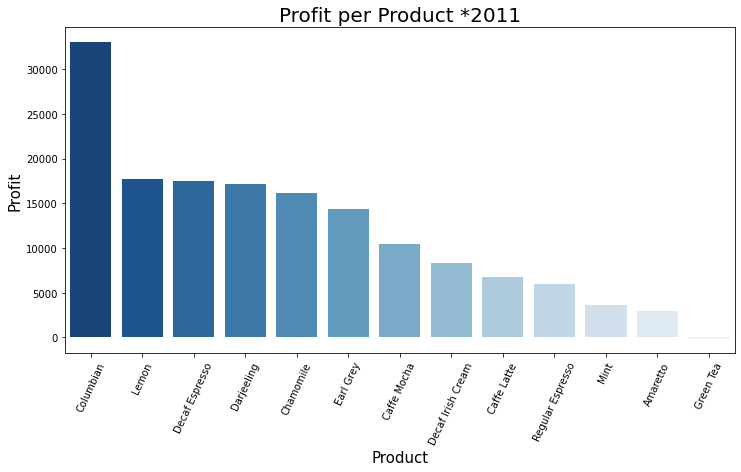

In [43]:
# creating a sorted df
P_2011_s = P_2011.sort_values(by="Profit",ascending=False)

# extracting the indexes names form the grouped data
g2_names = []
for i in range(len(P_2011_s)):
    v = P_2011_s.index[i][1]
    g2_names.append(v)

# extracting the indexes vlaues form the grouped data
g2_values = P_2011_s['Profit'].values

# creating the bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=g2_names,y=g2_values,palette='Blues_r')
plt.xticks(rotation=65)
plt.title("Profit per Product *2011", fontsize=20)
plt.xlabel("Product", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.show()

> almost the same distribution as the last year but with a larger scale ( total profit above 30000)

### Let's see if there where any trend that occurs in the last two years

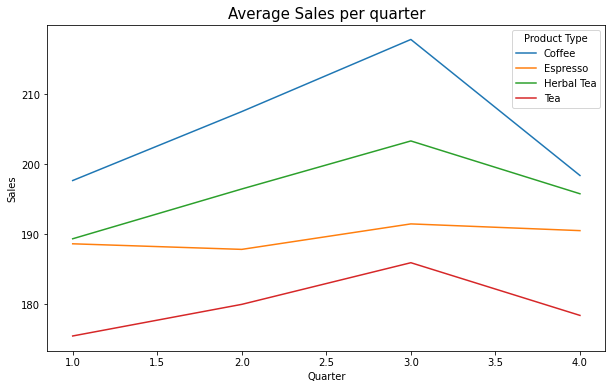

In [44]:

q = df.groupby(['Quarter','Product Type'],as_index=False)['Sales'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x='Quarter',y='Sales', data=q,hue='Product Type')
plt.title('Average Sales per quarter', fontsize=15)
plt.show()

> our average sales rise during the Third Quarter

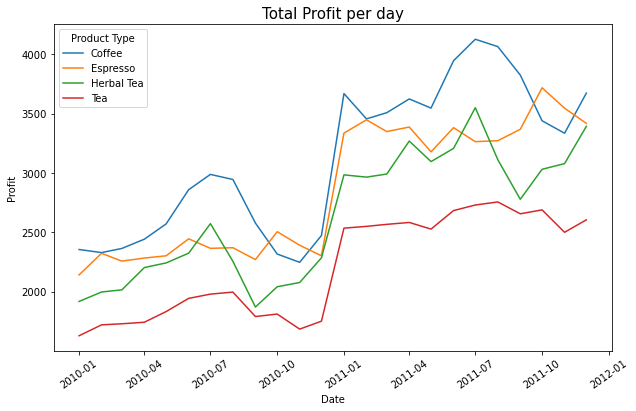

In [45]:
Profit = df.groupby(['Date','Product Type'],as_index=False)['Profit'].sum()

plt.figure(figsize=(10,6))
sns.lineplot(x='Date',y='Profit', data=Profit,hue='Product Type')
plt.title('Total Profit per day', fontsize=15)
plt.xticks(rotation=35)
plt.show()

> Total profit almost doubled in the second year *2011 but still follows the same trend.

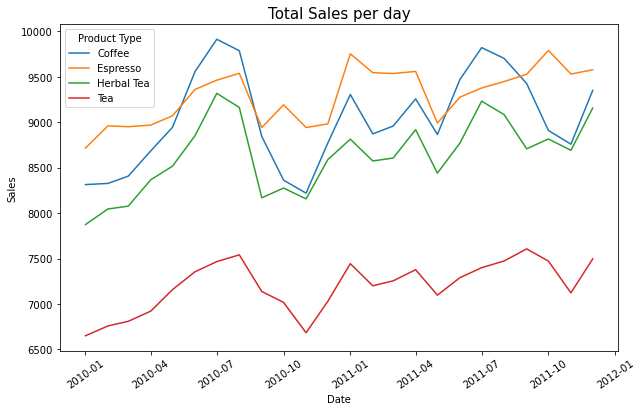

In [46]:
Profit = df.groupby(['Date','Product Type'],as_index=False)['Sales'].sum()

plt.figure(figsize=(10,6))
sns.lineplot(x='Date',y='Sales', data=Profit,hue='Product Type')
plt.title('Total Sales per day', fontsize=15)
plt.xticks(rotation=35)
plt.show()

## 2 | Exploring our Market

In [47]:
df.head()

,id,Store Code,State,Market,Market Size,Profit,Gross Profit,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Gross Profit,Budget Sales,ProductId,Date,Product Type,Product,Type,Month,Day,Year,Quarter
0,1,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,2010-04-01,Coffee,Columbian,Regular,4,1,2010,2
1,2,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2010-07-01,Coffee,Columbian,Regular,7,1,2010,3
2,3,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,2010-11-01,Coffee,Columbian,Regular,11,1,2010,4
3,4,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,2010-12-01,Coffee,Columbian,Regular,12,1,2010,4
4,5,203,Connecticut,East,Small Market,104.0,133.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2011-07-01,Coffee,Columbian,Regular,7,1,2011,3


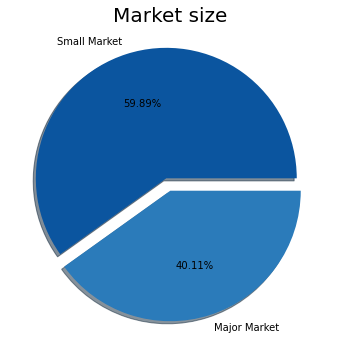

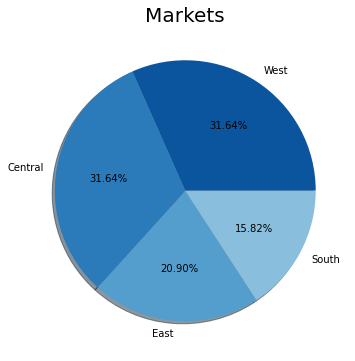

In [48]:
# market size
explode = [0.1, 0]
type_pie = df['Market Size'].value_counts()/df.shape[0]
plt.figure(figsize=(8, 6))
plt.pie(type_pie.values, labels=type_pie.index, autopct='%1.2f%%', colors=mycolors,
       explode = explode, shadow = True)
plt.title("Market size", fontsize=20)
plt.show()

# Market
explode = [0, 0, 0, 0]
type_pie = df['Market'].value_counts()/df.shape[0]
plt.figure(figsize=(8, 6))
plt.pie(type_pie.values, labels=type_pie.index, autopct='%1.2f%%', colors=mycolors,
       explode = explode, shadow = True)
plt.title("Markets", fontsize=20)
plt.show()

### How does our market hierarchy looks like?

In [49]:
P_2010 = df_2010.groupby(['Market Size', 'Market', 'State']).count()[['Store Code']]
P_2010

Store Code
Market Size  Market  State                    
Major Market Central Colorado              132
                     Illinois              108
                     Ohio                  108
             East    Florida               108
                     Massachusetts          72
                     New York               96
             South   Texas                  84
             West    California            144
Small Market Central Iowa                  108
                     Missouri              108
                     Wisconsin             108
             East    Connecticut            84
                     New Hampshire          84
             South   Louisiana              84
                     New Mexico             84
                     Oklahoma               84
             West    Nevada                132
                     Oregon                132
                     Utah                  144
                     Washington            120

### Analysing Total Profit per states

In [50]:
market_profits = df.groupby('State').sum()[['Profit']].sort_values(by="Profit",ascending=False)
market_profits

C:\Users\Dell\AppData\Local\Temp\ipykernel_2508\3047255690.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  market_profits = df.groupby('State').sum()[['Profit']].sort_values(by="Profit",ascending=False)


,Profit
State,
California,31785.0
Illinois,30821.0
Iowa,22212.0
New York,20096.0
Colorado,17743.0
Massachusetts,16442.0
Texas,15766.0
Oregon,12439.0
Florida,12310.0


### We'll plot a Pareto chart to help us better understand the grouped data

In [51]:
marketpro_x = market_profits.index
marketpro_y = list(market_profits["Profit"].values.round())
marketpro_cdf = market_profits.cumsum()/market_profits.sum()*100

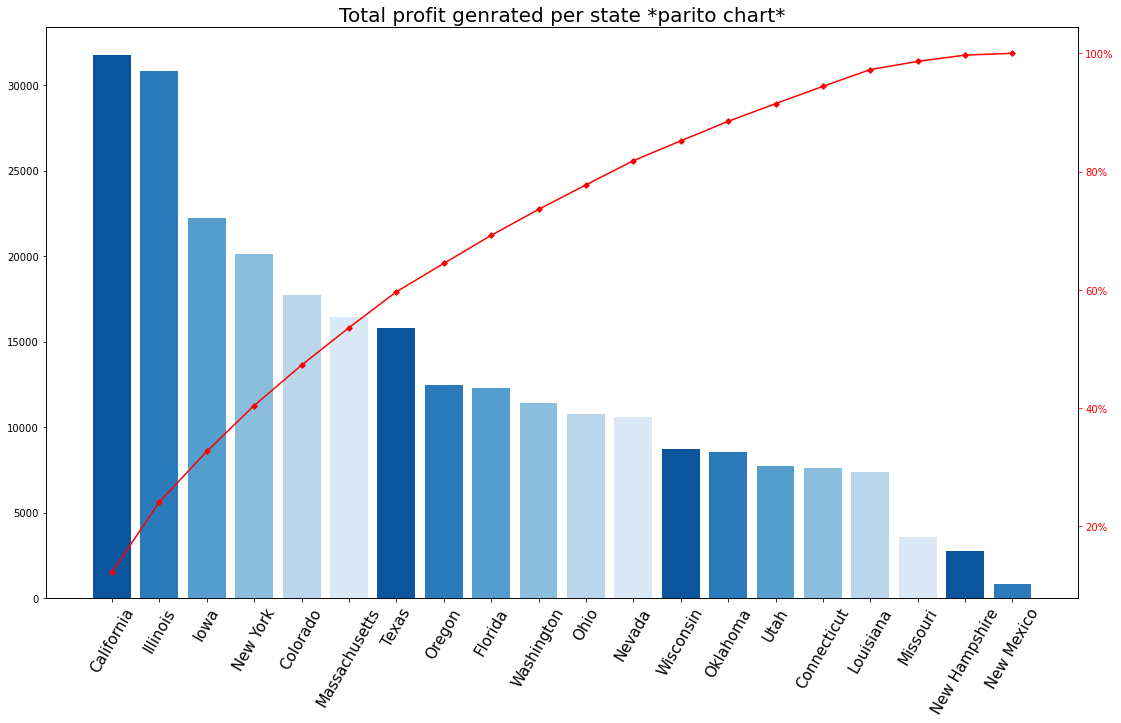

In [52]:
#Which market is the most profitable?
#define aesthetics for plot
color1 = mycolors
color2 = 'red'
line_size = 4

#calculationg CDF
marketpro_cdf = np.array(marketpro_y).cumsum()/np.array(marketpro_y).sum()*100

#create basic bar plot
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.bar(marketpro_x, marketpro_y, color=color1)
plt.xticks(rotation=60, fontsize=15)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(marketpro_x, marketpro_cdf, color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
plt.title("Total profit genrated per state *parito chart*", fontsize=20)
ax.tick_params(axis='x', colors="black")
ax2.tick_params(axis='y', colors=color2)

plt.show()

In [53]:
print(f'|{marketpro_cdf[np.where(marketpro_x == "Colorado")[0][0]].round(2)}% of our Profit was genrated from only 5 states(California, Illinois, Iowa, New York, Colorado)|')

|47.26% of our Profit was genrated from only 5 states(California, Illinois, Iowa, New York, Colorado)|


### Total sales per state

In [54]:
df.groupby(["State"],as_index=False)['Sales'].sum().sort_values(by="Sales",ascending=False).head(10)

,State,Sales
0,California,96892.0
12,New York,70852.0
4,Illinois,69883.0
9,Nevada,60159.0
5,Iowa,54750.0
1,Colorado,48179.0
15,Oregon,40899.0
18,Washington,38930.0
3,Florida,37443.0
16,Texas,37410.0


### Lets's answer some Questions we've asked in the summary statistics section

### maximum profit

In [55]:
df[df['Profit'] == df['Profit'].max()]

,id,Store Code,State,Market,Market Size,Profit,Gross Profit,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Gross Profit,Budget Sales,ProductId,Date,Product Type,Product,Type,Month,Day,Year,Quarter
4199,4200,978,Massachusetts,East,Major Market,778.0,607.0,659.0,52.0,46.0,17.0,-1493.0,560.0,40.0,590.0,630.0,2,2011-07-01,Coffee,Columbian,Regular,7,1,2011,3


> Although store 978 generates the largest Profit is has a negative balance of inventory, which means that the store incurred Profits without delivering the product to it's customers

In [56]:
# maximum sales
df[df['Sales'] == df['Sales'].max()]

,id,Store Code,State,Market,Market Size,Profit,Gross Profit,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Gross Profit,Budget Sales,ProductId,Date,Product Type,Product,Type,Month,Day,Year,Quarter
2815,2816,707,California,West,Major Market,370.0,548.0,912.0,364.0,178.0,127.0,2654.0,530.0,450.0,690.0,1140.0,2,2010-07-01,Coffee,Columbian,Regular,7,1,2010,3
3612,3613,845,New York,East,Major Market,370.0,548.0,912.0,364.0,178.0,127.0,2654.0,370.0,340.0,520.0,860.0,2,2010-07-01,Coffee,Columbian,Regular,7,1,2010,3


> In terms of sales we have California and New York, and their highest sales were associated with Columbian our most profitable product

In [57]:
# minmum sales
df[df['Sales'] == df['Sales'].min()]

,id,Store Code,State,Market,Market Size,Profit,Gross Profit,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Gross Profit,Budget Sales,ProductId,Date,Product Type,Product,Type,Month,Day,Year,Quarter
2718,2719,702,Nevada,West,Small Market,-354.0,-228.0,17.0,245.0,126.0,93.0,1419.0,-240.0,160.0,-160.0,0.0,13,2010-01-01,Tea,Green Tea,Regular,1,1,2010,1


> the lowest sales was associated with Green tea Product

In [58]:
# maximum marketing
df[df['Marketing'] == df['Marketing'].max()]

,id,Store Code,State,Market,Market Size,Profit,Gross Profit,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Gross Profit,Budget Sales,ProductId,Date,Product Type,Product,Type,Month,Day,Year,Quarter
157,158,212,New York,East,Major Market,-392.0,-96.0,77.0,173.0,176.0,156.0,2615.0,-260.0,160.0,-90.0,70.0,5,2011-08-01,Espresso,Caffe Mocha,Regular,8,1,2011,3
1896,1897,518,New York,East,Major Market,-284.0,-95.0,78.0,173.0,189.0,156.0,2615.0,-260.0,160.0,-90.0,70.0,5,2010-08-01,Espresso,Caffe Mocha,Regular,8,1,2010,3
1915,1916,530,California,West,Major Market,50.0,239.0,412.0,173.0,189.0,156.0,927.0,60.0,160.0,230.0,390.0,5,2010-08-01,Espresso,Caffe Mocha,Regular,8,1,2010,3
2752,2753,702,Nevada,West,Small Market,68.0,235.0,408.0,173.0,177.0,156.0,927.0,70.0,140.0,220.0,360.0,8,2011-08-01,Herbal Tea,Chamomile,Decaf,8,1,2011,3
3314,3315,775,Nevada,West,Small Market,49.0,239.0,412.0,173.0,190.0,156.0,927.0,70.0,140.0,220.0,360.0,8,2010-08-01,Herbal Tea,Chamomile,Decaf,8,1,2010,3
3957,3958,951,California,West,Major Market,69.0,235.0,408.0,173.0,176.0,156.0,927.0,60.0,160.0,230.0,390.0,5,2011-08-01,Espresso,Caffe Mocha,Regular,8,1,2011,3


> highest Marketing costs are in California, New York, and Nevada

### Analyzing Profit across the 4 markets 

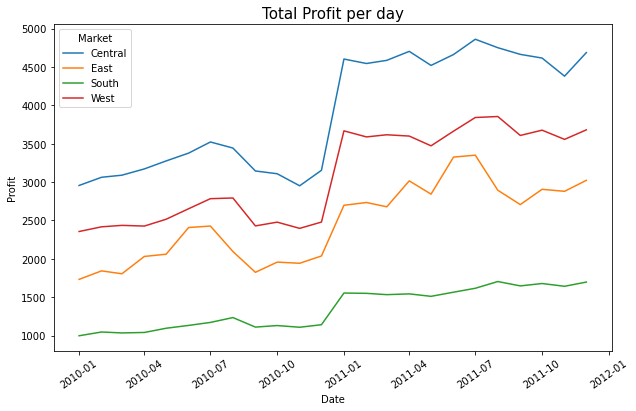

In [59]:
Profit = df.groupby(['Date','Market'],as_index=False)['Profit'].sum()

plt.figure(figsize=(10,6))
sns.lineplot(x='Date',y='Profit', data=Profit,hue='Market')
plt.title('Total Profit per day', fontsize=15)
plt.xticks(rotation=35)
plt.show()

> Our profit almost doubled

### Top 10 stores in terms of profit

In [60]:
g_store = df.groupby(["Store Code"],as_index=False)['Sales'].sum().sort_values(by="Sales",ascending=False).head(10)
g_store

,Store Code,Sales
110,775,30380.0
92,702,29779.0
50,435,25990.0
54,503,16071.0
56,505,15892.0
75,603,14887.0
150,970,14634.0
1,206,13820.0
151,971,13770.0
70,563,13426.0


In [61]:
df[df['Store Code'] == '775'].sample(1)

,id,Store Code,State,Market,Market Size,Profit,Gross Profit,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Gross Profit,Budget Sales,ProductId,Date,Product Type,Product,Type,Month,Day,Year,Quarter
3301,3302,775,Nevada,West,Small Market,21.0,32.0,53.0,21.0,16.0,5.0,798.0,20.0,20.0,30.0,50.0,6,2011-06-01,Espresso,Decaf Espresso,Decaf,6,1,2011,2


> top store in terms of total sales was store 775 with 30380 total sales<br>
> Store 775 is located in West Market specifically Nevada state

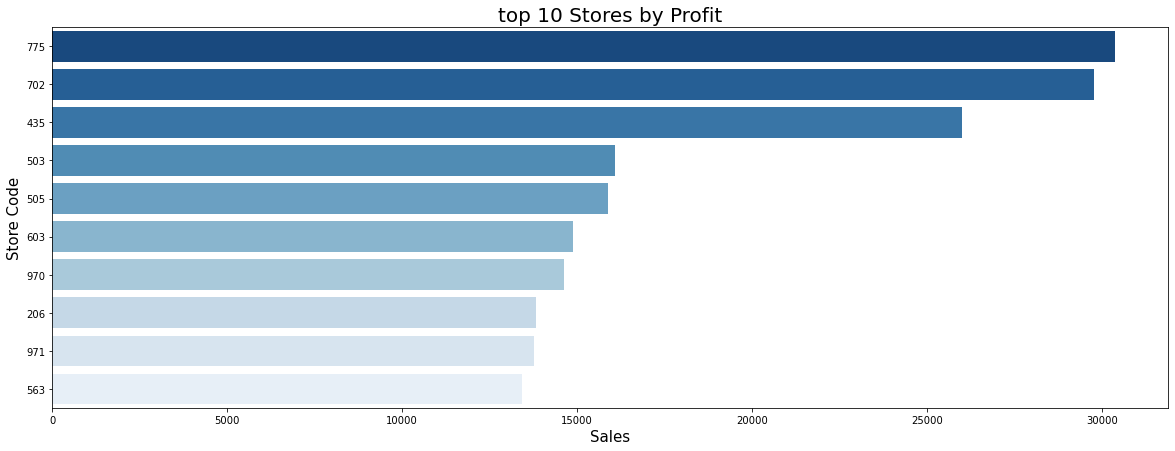

In [62]:
x = g_store['Sales'].values
y = g_store['Store Code'].values

plt.figure(figsize=(20, 7))
sns.barplot(x = x, y = y, palette='Blues_r')
plt.title('top 10 Stores by Profit', fontsize=20)
plt.ylabel("Store Code", fontsize=15)
plt.xlabel("Sales", fontsize=15)
plt.show()

### We need to know what are the stores that hold a negative inventory balance 
> As we mentioned previously negative inventory balance occurs when a shipment of inventory has been recorded as complete even though it might still be in production which causes a delay

In [63]:
df[df['Inventory'] < 0]['Product'].value_counts()

Caffe Latte    68
Columbian      20
Name: Product, dtype: int64

> This negative balance happens to appear in Two Products:<br>
Caffe Latte : occured 68 time<br>
Caffe Columbian  : occured 20 time<br>

### where the stores holds these negative balances are?

In [64]:
Negative_inv = df[df['Inventory'] < 0]
Negative_inv.groupby(["Market","State","Product" ],as_index=False)['Store Code'].count()

,Market,State,Product,Store Code
0,East,Massachusetts,Columbian,20
1,South,Louisiana,Caffe Latte,16
2,South,New Mexico,Caffe Latte,18
3,South,Oklahoma,Caffe Latte,18
4,South,Texas,Caffe Latte,16


> South Market Lakes' supply of Caffe Latte, South Market was the lowest in terms of profit and orders, so it's not surprising to find issues in its operations.

> but on the other hand there are 20 stores that recorded a negative inventory balance in the East Market specifically Massachusetts which was one of the top 6 states in terms of profits, the negative recorded product was "Columbian" which is the most profitable product we have.
This problem may cause a lot of issues with our customers we may lose their loyalty 

> We can get store codes using Groupby.

### Finally we'll compare States performance using Financial Ratios

> So the ratios we'll use are:<br>
1- Profit Margin --> Gross Profit / Sales (Profitability Ratio) <br>
2- inventory Turnover Ratio --> inventory / COGS  (Efficiency Ratio) <br>

In [65]:
df_ratio = df.groupby(['Year',"State"],as_index=False)['Gross Profit', 'Sales', 'Inventory', "COGS"].sum() 
df_ratio

C:\Users\Dell\AppData\Local\Temp\ipykernel_2508\1991846041.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ratio = df.groupby(['Year',"State"],as_index=False)['Gross Profit', 'Sales', 'Inventory', "COGS"].sum()


,Year,State,Gross Profit,Sales,Inventory,COGS
0,2010,California,24701.0,47442.0,183525.0,22741.0
1,2010,Colorado,13358.0,23559.0,90706.0,10201.0
2,2010,Connecticut,7176.0,12411.0,62706.0,5235.0
3,2010,Florida,10593.0,18341.0,73671.0,7748.0
4,2010,Illinois,19477.0,34218.0,101523.0,14741.0
5,2010,Iowa,15039.0,26798.0,112234.0,11759.0
6,2010,Louisiana,6617.0,11316.0,39215.0,4699.0
7,2010,Massachusetts,10124.0,14657.0,23741.0,4533.0
8,2010,Missouri,6335.0,12052.0,64947.0,5717.0
9,2010,Nevada,13733.0,29460.0,167993.0,15727.0


In [66]:
# Calculating the ratios
df_ratio['Profit Margin'] = round(df_ratio['Gross Profit'] / df_ratio['Sales'] *100)
df_ratio['Inventory Turnover'] = round(df_ratio['Inventory'] / df_ratio['COGS'])

### Profit Margine

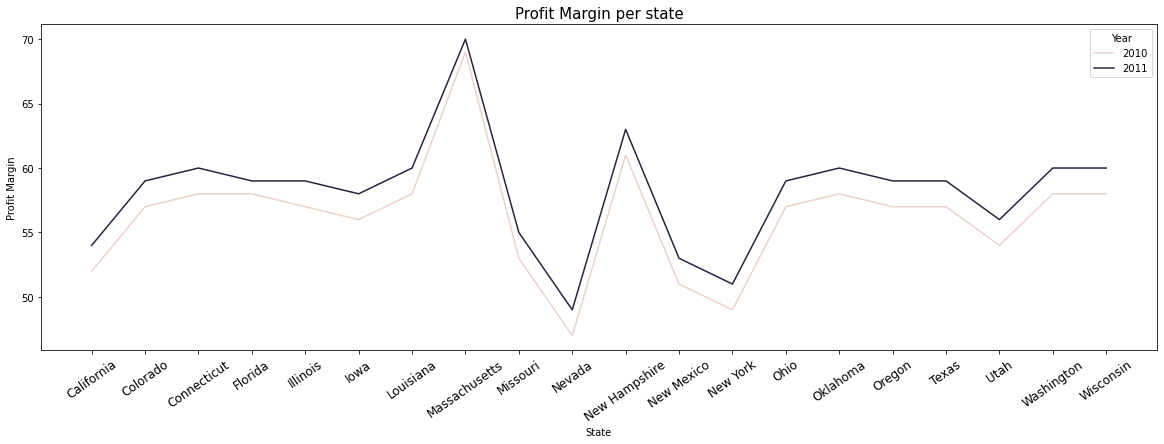

In [67]:
df_r = df_ratio[['Year', "State", "Profit Margin", 'Inventory Turnover']]

plt.figure(figsize=(20,6))
sns.lineplot(x='State',y='Profit Margin', data=df_r ,hue='Year')
plt.title('Profit Margin per state', fontsize=15)
plt.xticks(rotation=35, fontsize=12)
plt.show()

> Massachusetts and New Hampshire got the highest Profit Margin in both years (2010 & 2011)

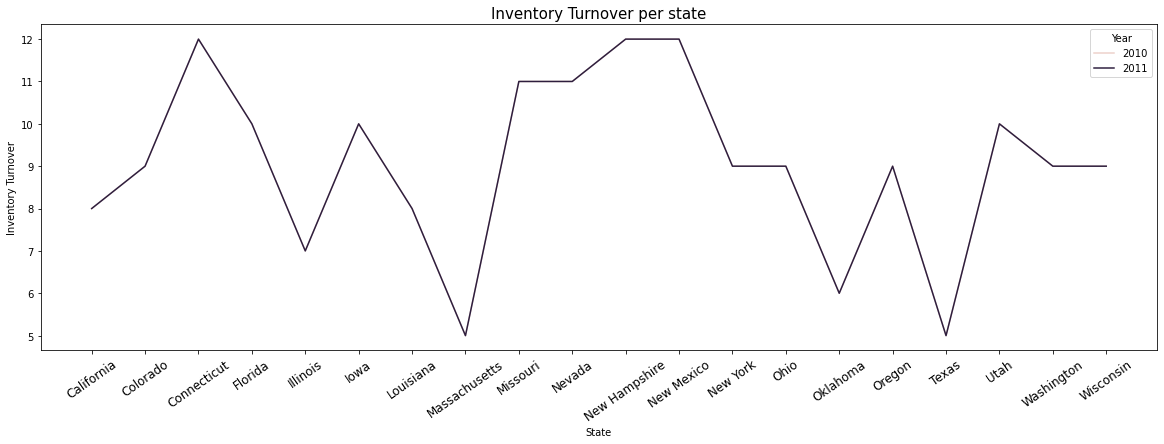

In [68]:
plt.figure(figsize=(20,6))
sns.lineplot(x='State',y='Inventory Turnover', data=df_r ,hue='Year')
plt.title('Inventory Turnover per state', fontsize=15)
plt.xticks(rotation=35, fontsize=12)
plt.show()

> inventory turnover ratio was the same for the two years because the inventory and COGS balances for the two years were the same

### Total inventory

In [69]:
inv_df = df.groupby(["State"],as_index=False)['Inventory'].sum().sort_values(by="Inventory",ascending=False)

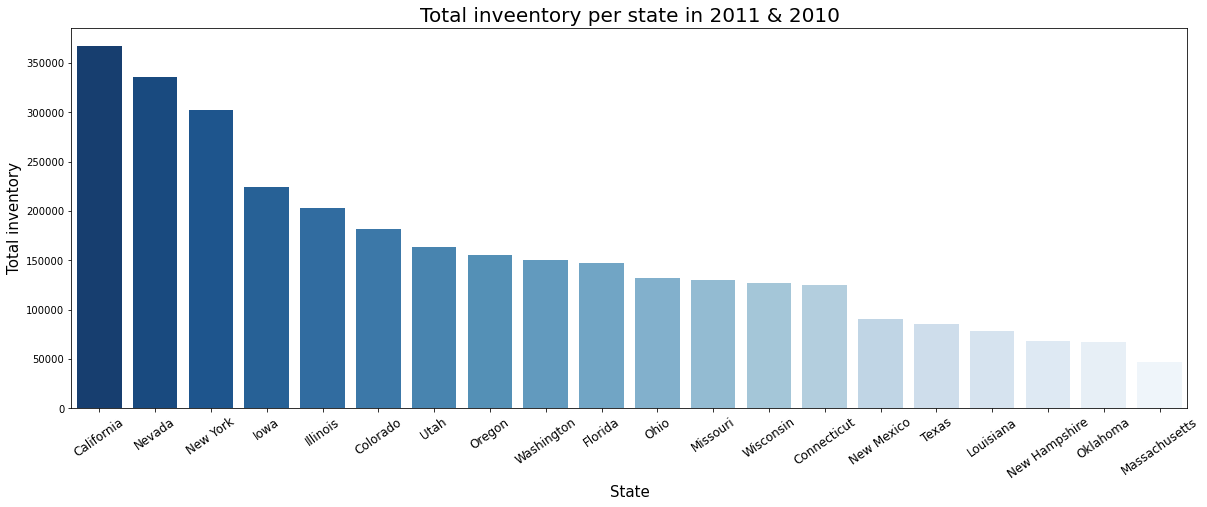

In [70]:
x = inv_df['State'].values
y = inv_df['Inventory'].values

plt.figure(figsize=(20, 7))
sns.barplot(x = x, y = y, palette='Blues_r')
plt.title('Total inveentory per state in 2011 & 2010', fontsize=20)
plt.ylabel("Total inventory", fontsize=15)
plt.xlabel("State", fontsize=15)
plt.xticks(rotation=35, fontsize=12)
plt.show()

### Total Profit for each year

In [71]:
print(f'Total profit genrated in 2010 : {df_2010["Profit"].sum()}')
print(f'Total profit genrated in 2011 : {df_2011["Profit"].sum()}')
print(f'Total Profit incrased by: {((df_2011["Profit"].sum()/df_2010["Profit"].sum())-1).round(2)*100}%')

Total profit genrated in 2010 : 105826.0
Total profit genrated in 2011 : 153717.0
Total Profit incrased by: 45.0%


### Total Sales for each year

In [72]:
_2010S = df_2010["Sales"].sum()
_2011S = df_2011["Sales"].sum()
print(f'Total Sales genrated in 2010 : $ {_2010S}')
print(f'Total Sales genrated in 2011 : $ {_2011S}')
print(f'Total Sales incrased by: {((_2011S/_2010S)-1).round(2)*100}%')

Total Sales genrated in 2010 : $ 401159.0
Total Sales genrated in 2011 : $ 418652.0
Total Sales incrased by: 4.0%


### Profit margin

In [73]:
_2010Ma = ((df_2010['Gross Profit'].sum() / df_2010['Sales'].sum())*100).round(2)
_2011Ma = ((df_2011['Gross Profit'].sum() / df_2011['Sales'].sum())*100).round(2)

print(f'Profit margin in 2010: {_2010Ma}%')
print(f'Profit margin in 2011: {_2011Ma}%')
print(f'increased by: {(_2011Ma - _2010Ma).round(2)}%')

Profit margin in 2010: 55.3%
Profit margin in 2011: 57.16%
increased by: 1.86%


## <a id="conc">EDA Conclusion</a>

#### We have Two Types of market size:
> - <b>Major Market</b> ( 40.11% )
> - <b>Small Market</b> ( 59.89% )
<br>

#### Our stores are fistributed across 4 markets:
> - <b> West (largest 31%)</b> "*Genrates the Hieghest Profit*"
> - <b> Central (31.64%)</b>
> - <b> East (20.90%)</b>
> - <b> South (Lowest 15.82)</b> "*Generates the lowest Profit*"
<br>
#### The stores are distributed across 20 states:
> Almost half our profit ( 47.26% ) was generated from only 5 of these states:<br>
> (California - Illinois - Iowa - New York - Colorado)
#### There are 156 stores distributed across the US states:
> the Top store in terms of Total sales was a store (775):
> > - Located in Nevada (West Market) 
> > - Total sales generated was 30380 <br>
#### We have 4 types of Products
> - Espresso & Coffe (mode Price 190)
> - Herbal Tea & Tea (mode Price 43)
<br>
#### our Products are categorized into 2 types:
> - Regular
> - decaf (decaffeinated coffee)
### Profit:
> - 1- the Total profit almost doubled in 2011 (increased by 45%)
> - 2- on the other hand sales only increased by 4% <br>
><br>
> <b>Posible Explanation:</b> The company developed the efficiency of its operations, which decreases its total Expenses, but we'll need to have a discussion with the finance team to better understand how expenses were calculated
> <br>
> <br>

> - 3- there is a negative Profit(loss) associated with Green Tea (Green Tea also was the lowest in terms of sales)<br>
<b>Note:</b> We need to perform Further analysis on the Green tea product to decide whether to figure out a way to improve its sales or stop producing it.
><br>
><br>

> -  4- the maximum profit was generated by store (978):
> Although store 978 generates the largest Profit it has a negative balance of inventory, which means that the store incurred Profits without delivering the product to its customers.

> -  5- maximum total profit was generated by store 775, located in the western market, Nevada state ( \\$30380 )
### Sales:
> - 1- the average sales significantly increased in the third Q 

> - 2- Actual sales were better than budgeted sales
> >  - Actula sales median (\\$138), while budgeted was( \\$130)
> >  - Budgeted min sales was 0, in contrast, the actual min sales was \\$17
> >  - Finally the 75th percentile of the actual sales was higher than the budgeted by $20

> - 3- the maximum sales value generated in a single day was made by California and new york respectively ( they were associated with Columbian our most profitable product)

> - 4- Maximum total sales over the two years were generated by California ( $96892)

### Marketing:
> - 1- The average marketing cost was \\$31 <br>

> - 2- 75% of the data has a marketing cost lower than \\$39

> - 3- there are 4 outliers in marketing cost associated with:
> > - Chamomile in 2 stores located in Nevada
> > - Coffee Mocha in 2 stores located in California.

### Inventory:
> Inventory shows a negative balance which could be due to: a delay in delivering products to customers or a delay in manufacturing that caused a delay in meeting the delivery date, it also could be due to a high demand that we the stores can't meet

> These negative balances occur in a:
> > - 20 stores located in Massachusett (East Market), the product associated with these negative values was "Columbian"
> > - 68 stores in the south market, and the product associated with the negative records was "Caffee Latte"

### Profit margin and inventory turnover: 
> higest profit margin:
> > -  Massachusett ( has a negative inventory balance in 20 stores, and was one of the lowest states in terms of inventory turnover), which means that it could be incurring profit without delivering products to customers in time
> > - New New Hampshire	( one of the highest  states in terms of inventory turnover )

> -  states with highest turnover ratios ( new Hampshire - Connecticut - Nevade *one of the top 3 in terms of total inventory*)

In [98]:
#df.to_csv('US_sales_Cleaned.csv')

#  not completed

## <a id='ml' >ML</a>

<b> we'll try to creat a module that predict Sales </b>

In [75]:
ml_df = df

In [76]:
ml_df.head()

,id,Store Code,State,Market,Market Size,Profit,Gross Profit,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Gross Profit,Budget Sales,ProductId,Date,Product Type,Product,Type,Month,Day,Year,Quarter
0,1,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,2010-04-01,Coffee,Columbian,Regular,4,1,2010,2
1,2,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2010-07-01,Coffee,Columbian,Regular,7,1,2010,3
2,3,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,2010-11-01,Coffee,Columbian,Regular,11,1,2010,4
3,4,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,2010-12-01,Coffee,Columbian,Regular,12,1,2010,4
4,5,203,Connecticut,East,Small Market,104.0,133.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2011-07-01,Coffee,Columbian,Regular,7,1,2011,3


> first we need to narrow our scope, so let's remove some unnecessary columns

In [77]:
ml_df.columns

Index(['id', 'Store Code', 'State', 'Market', 'Market Size', 'Profit',
       'Gross Profit', 'Sales', 'COGS', 'Total Expenses', 'Marketing',
       'Inventory', 'Budget Profit', 'Budget COGS', 'Budget Gross Profit',
       'Budget Sales', 'ProductId', 'Date', 'Product Type', 'Product', 'Type',
       'Month', 'Day', 'Year', 'Quarter'],
      dtype='object')

> - we'll be trying to remove any unnecessary hierarchy that gives the same info and does not make any difference
> - also I'll remove all the financial data, except our target value which is Sales
> - my target option was either to choose to predict ( profit or sales), and I've chosen sales as it has fewer outliers than profit.

In [78]:
ml_df.drop(['id', 'Store Code', 'Market', 'Profit', 'Profit','Gross Profit', 'COGS', 'Total Expenses', 'Marketing',
       'Inventory', 'Budget Profit', 'Budget COGS', 'Budget Gross Profit',
       'Budget Sales', 'ProductId', 'Date', 'Product Type', 'Type', 'Day'], axis=1,inplace = True)

In [79]:
ml_df.head()

,State,Market Size,Sales,Product,Month,Year,Quarter
0,Connecticut,Small Market,292.0,Columbian,4,2010,2
1,Connecticut,Small Market,225.0,Columbian,7,2010,3
2,Connecticut,Small Market,325.0,Columbian,11,2010,4
3,Connecticut,Small Market,289.0,Columbian,12,2010,4
4,Connecticut,Small Market,223.0,Columbian,7,2011,3


In [80]:
ml_df.dtypes

State           object
Market Size     object
Sales          float64
Product         object
Month            int64
Year             int64
Quarter          int64
dtype: object

how would we handle each data type?<br>
our data types are: 
> ##### 1- Categorical data:
> (State) -->  Target Encoding<br>
> (Product, Market size) --> dummy variables<br>
    
> ##### 2- Numerical data:
> (Month, Year, Quarter) --> Standardscaler<br>
> (sales) --> First we'll remove outliers then use the Standardscaler<br>

#### Sales column

In [81]:
Q1 = ml_df.Sales.quantile(0.25)
Q3 = ml_df.Sales.quantile(0.75)
IQR = Q3 - Q1

df_ml_Q = ml_df[~((ml_df.Sales < (Q1 - 1.5 * IQR)) |(ml_df.Sales > (Q3 + 1.5 * IQR)))]

In [82]:
# State
import category_encoders as ce

tenc=ce.TargetEncoder() 
df_market=tenc.fit_transform(df_ml_Q['State'],df_ml_Q ['Sales'])

#df_new = df_market.join(df.drop('market',axis = 1))
#df_new
df_ml_Q['State'] = df_market['State']

C:\Users\Dell\AppData\Local\Temp\ipykernel_2508\488907763.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml_Q['State'] = df_market['State']


In [83]:
df_ml_Q.head()

,State,Market Size,Sales,Product,Month,Year,Quarter
0,151.363095,Small Market,292.0,Columbian,4,2010,2
1,151.363095,Small Market,225.0,Columbian,7,2010,3
2,151.363095,Small Market,325.0,Columbian,11,2010,4
3,151.363095,Small Market,289.0,Columbian,12,2010,4
4,151.363095,Small Market,223.0,Columbian,7,2011,3


In [85]:
## converting into dummies

In [86]:
Marketsize = pd.get_dummies(df_ml_Q["Market Size"], drop_first = True)
Product = pd.get_dummies(df_ml_Q["Product"], drop_first = True)
Years = pd.get_dummies(df_ml_Q["Year"], drop_first = True)
df_ml_Q = df_ml_Q.drop(["Market Size","Product" , "Year"], axis=1)
df_ml_Q = pd.concat([df_ml_Q,Marketsize], axis = 1)
df_ml_Q = pd.concat([df_ml_Q,Product], axis = 1)
df_ml_Q = pd.concat([df_ml_Q,Years], axis = 1)

In [87]:
df_ml_Q

,State,Sales,Month,Quarter,Small Market,Caffe Latte,Caffe Mocha,Chamomile,Columbian,Darjeeling,Decaf Espresso,Decaf Irish Cream,Earl Grey,Green Tea,Lemon,Mint,Regular Espresso,2011
0,151.363095,292.0,4,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,151.363095,225.0,7,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,151.363095,325.0,11,4,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,151.363095,289.0,12,4,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,151.363095,223.0,7,3,1,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,137.863100,113.0,7,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4244,137.863100,105.0,8,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4245,137.863100,131.0,12,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4246,137.863100,160.0,4,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1


In [88]:
## splitting data into target and feature metrics
X = df_ml_Q.drop('Sales' , axis = 1).values
y = df_ml_Q['Sales'].values

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [90]:
X = sm.add_constant(X)

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25 , random_state=42)

In [92]:
#standard scaling and normalizing the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler ()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [93]:
#linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [94]:
#the train data score/accuracy
linear_regression_TrainScore = lr.score(X_train,y_train)
linear_regression_TrainScore

0.24672530977642515

In [95]:
#the test data score/accuracy
linear_regression_TestScore = lr.score(X_test,y_test)
linear_regression_TestScore

0.2089772805708806

In [96]:
#the ridge model
rid = Ridge(alpha=0.01)
rid.fit(X_train,y_train)

Ridge(alpha=0.01)

In [97]:
#the train data score/accuracy
rid_TrainScore = rid.score(X_train,y_train)
rid_TrainScore

0.24672530976825957